In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")   
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Handling Total Charges Column

From above we can see that  Total Charges has continuous data but it is an object type. Lets handle this Column.

In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

Also, looking closely into the the data we can see that Total Charges contains some black values(spaces) which is condidered as the object type. 

In [7]:
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Replacing these columns with null values.

In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Now we can see there are some Null Values present in the Column.

Converting the Column form Object to Float Type.

In [10]:
df["TotalCharges"]=df["TotalCharges"].astype(float)

Now handling these Nan Values in TotalCharges column. And replacing the Null values with Mean of the column.

In [11]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now the Null values have been removed.

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:>

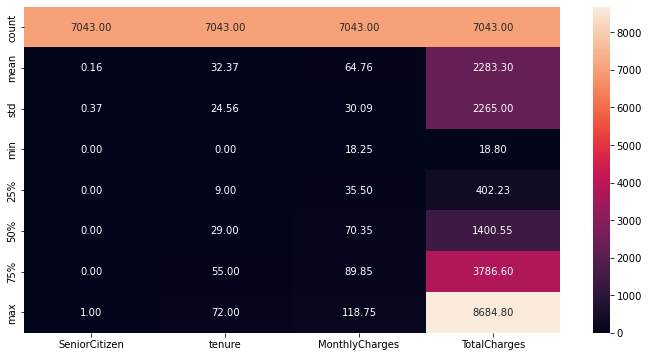

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df.describe(),annot=True,fmt="0.2f")

OBSERVATIONS:-
   1. Mean > Median for tenure & TotalCharges that means these columns are Right Skewed. 
   2. Mean < Median for MonthlyCharges that means this columns is left Skewed.
   3. Also, there is huge gap b/w 75th percentile & Max of the TotalCharges column that means Outliers are present in this coulumn.

# Exploratory Data Analysis & Visualization

UNIVARIATE ANALYSIS of Nominal Data

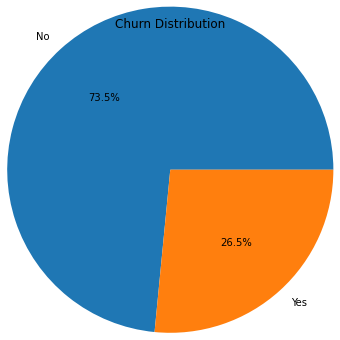

No     5174
Yes    1869
Name: Churn, dtype: int64


In [14]:
lb = df['Churn'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Churn Distribution")
plt.show()
print(df['Churn'].value_counts())

From above we can see that 73.5% of the Customers stay with the Service Provider. Whereas 26.5% stop using the services or shift to another service Provider.

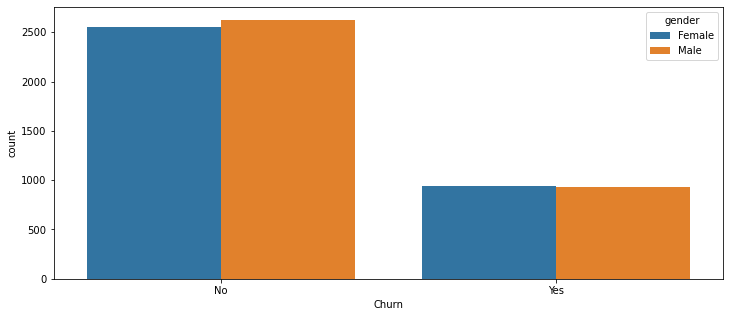

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(x='Churn',hue='gender',data=df)
plt.show()

There is almost equal distribution of Males & Females for both Churn Type.

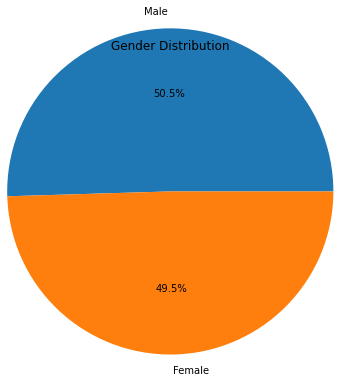

Male      3555
Female    3488
Name: gender, dtype: int64


In [16]:
lb = df['gender'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()
print(df['gender'].value_counts())

From above we can see that there are almost equal no. of Males & Females using the telecommunication services.

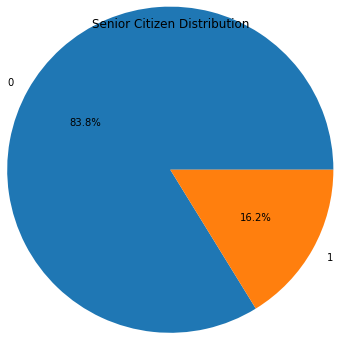

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


In [17]:
lb = df['SeniorCitizen'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Senior Citizen Distribution")
plt.show()
print(df['SeniorCitizen'].value_counts())

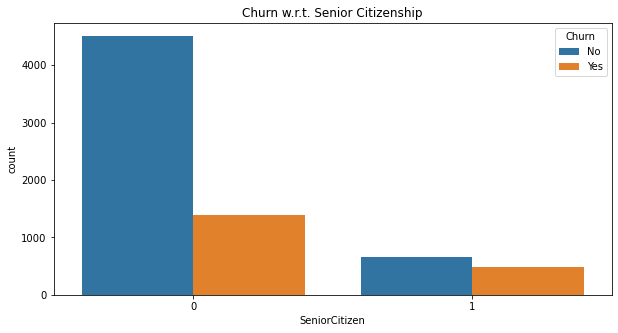

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title("Churn w.r.t. Senior Citizenship")
plt.show()

OBSERVATIONS: - 
   1. From above we can see that only 16.2 % of people using the services are Senior Citizen.
   2. A senior Citizer is more likely to Churn than all other customers.

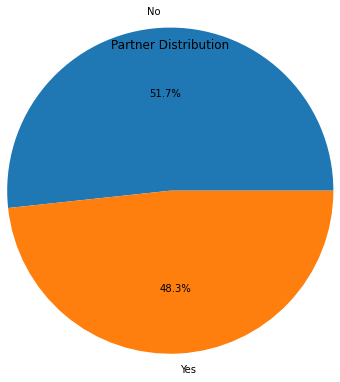

No     3641
Yes    3402
Name: Partner, dtype: int64


In [19]:
lb = df['Partner'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Partner Distribution")
plt.show()
print(df['Partner'].value_counts())

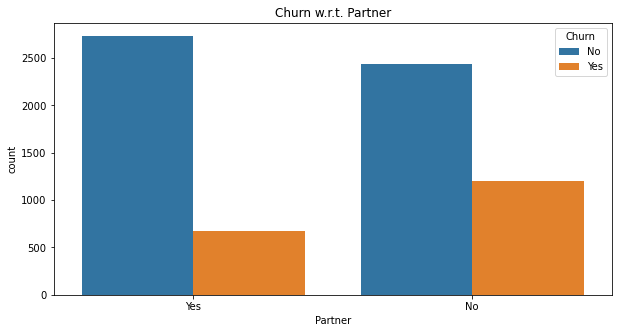

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Partner',hue='Churn',data=df)
plt.title("Churn w.r.t. Partner")
plt.show()

OBSERVATIONS:-
   1. There are almost equal no. of peoples using the serives i.e. people who have a partner & people those do not have any partner.
   2. The customers having No partners are more likely to Churn & stop the services than the ones who do have partners.

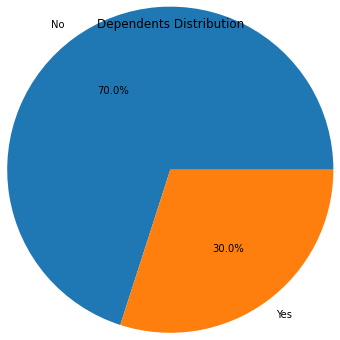

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [21]:
lb = df['Dependents'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Dependents Distribution")
plt.show()
print(df['Dependents'].value_counts())

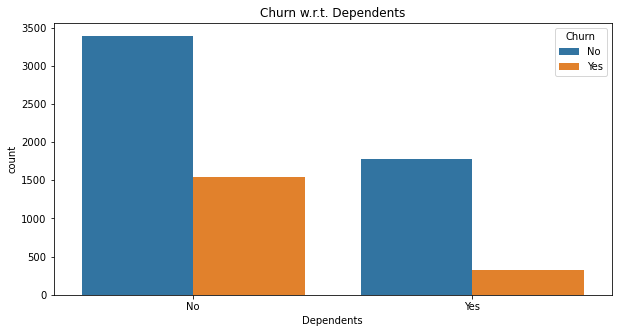

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',hue='Churn',data=df)
plt.title("Churn w.r.t. Dependents")
plt.show()

OBSERVATIONS:-
   1. We can see that out of all people using the telecommunication services 70% of them do not have any dependents. While only 30% of the people have dependents.
   2. Also, the customers with No Dependents are more likely to Churn & Stop the services.

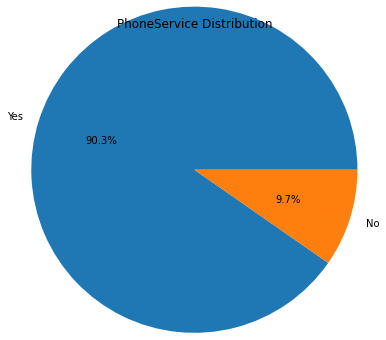

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [23]:
lb = df['PhoneService'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("PhoneService Distribution")
plt.show()
print(df['PhoneService'].value_counts())

From above we can see that Out of all the people 90.3 % of them do use the Phone Services whereas only 9.7% of people do not use these Phone Services.

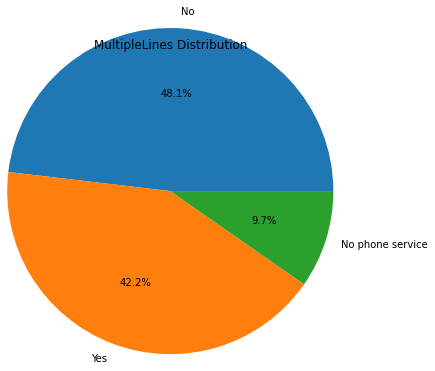

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [24]:
lb = df['MultipleLines'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("MultipleLines Distribution")
plt.show()
print(df['MultipleLines'].value_counts())

From above we can see that out off all the People using the Phone services. 48.1% of people do not have MultipleLines in there connections whereas 42.2 % of people do have MultipleLines in the connection.

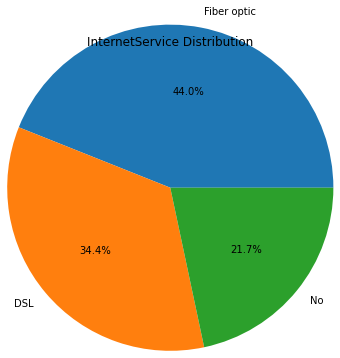

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


In [25]:
lb = df['InternetService'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("InternetService Distribution")
plt.show()
print(df['InternetService'].value_counts())

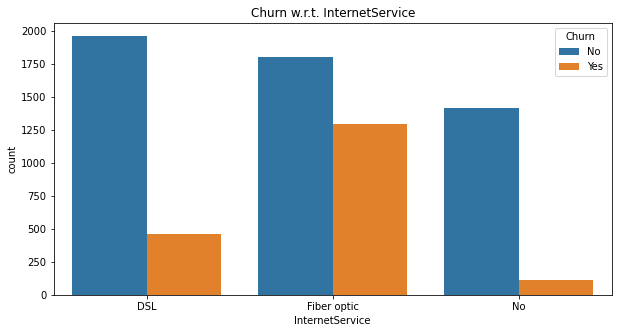

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='InternetService',hue='Churn',data=df)
plt.title("Churn w.r.t. InternetService")
plt.show()

OBSERVATIONS:-
   1. From above we can see that Out of all the people 21.7% of them do not use the Internet Services. Whereas 44% people use Fiber Optics Internet Serives & 34.4 % of people use DSL type Internet Service.
   2. Customers using Fiber Optice Internet Service are more likely to Churn & Stop the services than the people using DSL service. While the customers not using any Inetnet Services are least likely to Churn.

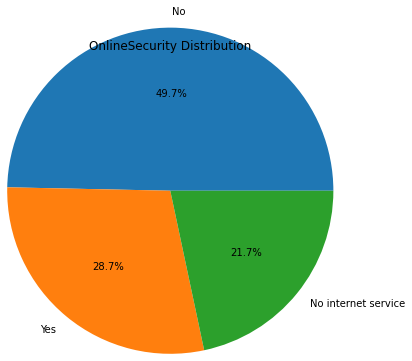

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [27]:
lb = df['OnlineSecurity'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("OnlineSecurity Distribution")
plt.show()
print(df['OnlineSecurity'].value_counts())

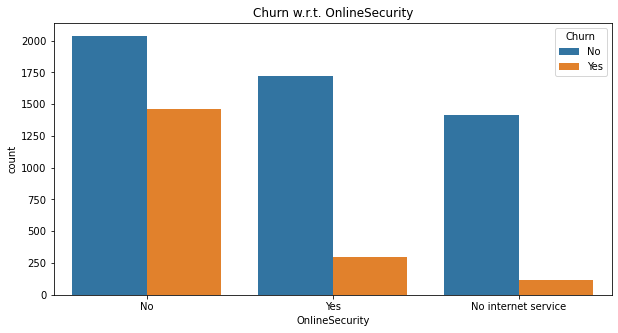

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x='OnlineSecurity',hue='Churn',data=df)
plt.title("Churn w.r.t. OnlineSecurity")
plt.show()

OBSERVATIONS:-
   1. From above we can see that 49.7 % of people do not Opt for Online Security. Whereas only 28.7 % of people do take Online Security. The rest do not use the Internet Services.
   2. Customers not using the Online Security are more likely to Churn than the customers using Online Security.

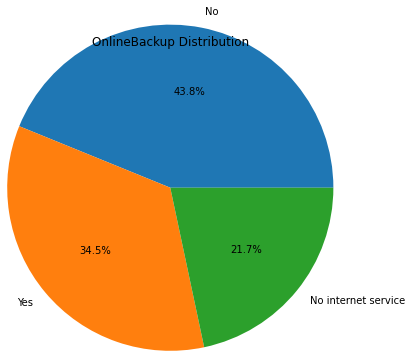

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [29]:
lb = df['OnlineBackup'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("OnlineBackup Distribution")
plt.show()
print(df['OnlineBackup'].value_counts())

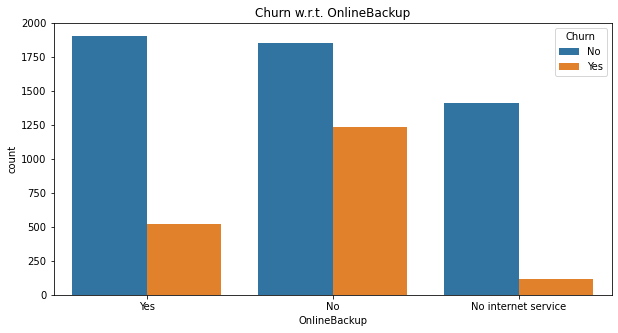

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='OnlineBackup',hue='Churn',data=df)
plt.title("Churn w.r.t. OnlineBackup")
plt.show()

OBSERVATIONS:-
   1. We can see that 43.8 % of people do not Opt for Online Backup while 34.5 % of people do take Online Backup. And the rest do not use the Internet Services. 
   2. Customers using Online Backup are less likely to Churn than the customers not using Online Backup.

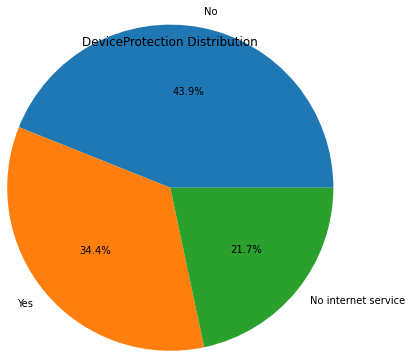

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [31]:
lb = df['DeviceProtection'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("DeviceProtection Distribution")
plt.show()
print(df['DeviceProtection'].value_counts())

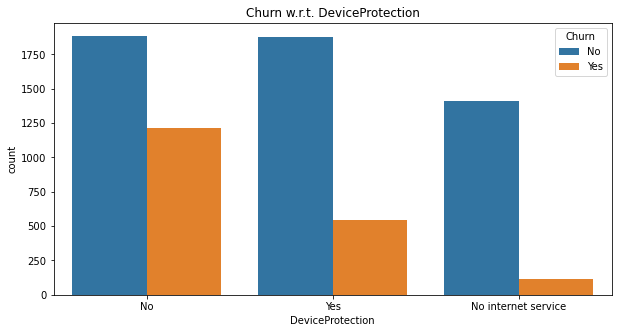

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x='DeviceProtection',hue='Churn',data=df)
plt.title("Churn w.r.t. DeviceProtection")
plt.show()

OBSERVATIONS:-
   1. We can see that 43.9 % of the people Do Not use Device Protection while 34.4% people do use Device Protection. The rest dont use the Internet Services. 
   2. Customers Not using Device protection are more likely to Churn & Stop the services than the customers using Device Protection.

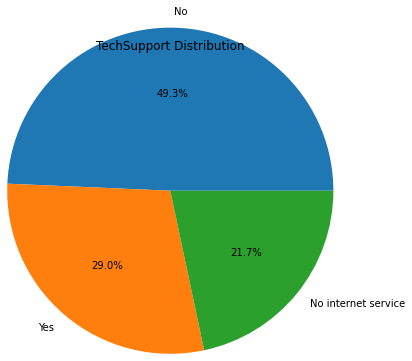

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [33]:
lb = df['TechSupport'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("TechSupport Distribution")
plt.show()
print(df['TechSupport'].value_counts())

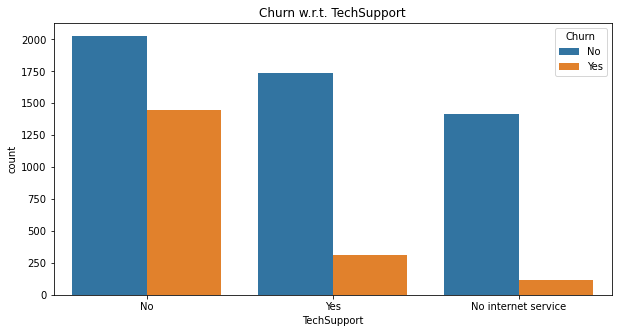

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x='TechSupport',hue='Churn',data=df)
plt.title("Churn w.r.t. TechSupport")
plt.show()

OBSERVATIONS:-
   1. We can see that 49.3 % of the customers do not have TechSupport while 29% of customers do have TechSupport. The rest dont use the Internet Services.
   2. Customers having Tech Support are less likely to Churn than the people not having Tech Support.

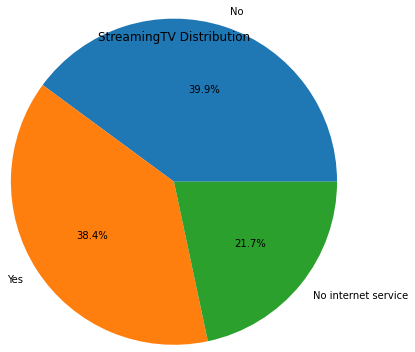

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [35]:
lb = df['StreamingTV'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("StreamingTV Distribution")
plt.show()
print(df['StreamingTV'].value_counts())

From above we can see that 39.9% of the Customers do not have StreamingTV while 38.4 % of the customers do have StreamingTV. The rest dont use the Internet Services.

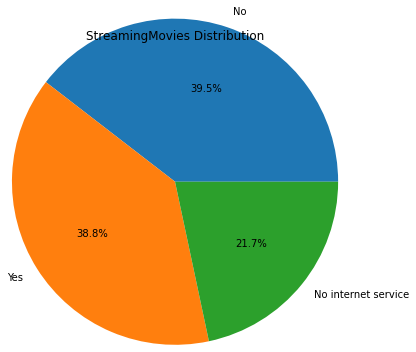

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [36]:
lb = df['StreamingMovies'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("StreamingMovies Distribution")
plt.show()
print(df['StreamingMovies'].value_counts())

From above we can see that 39.5% of the customers do not Stream Movies while 38.8 % of the customers do Stream Movies. The rest do not use the Internet Services.

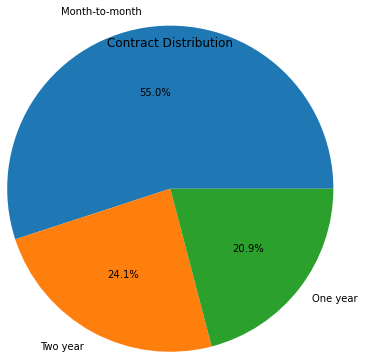

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


In [37]:
lb = df['Contract'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("Contract Distribution")
plt.show()
print(df['Contract'].value_counts())

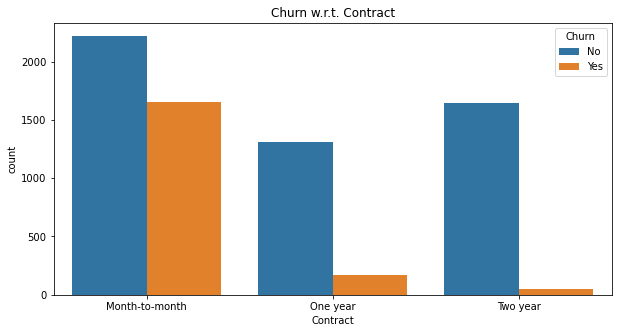

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='Contract',hue='Churn',data=df)
plt.title("Churn w.r.t. Contract")
plt.show()

OBSERVATIONS:-
   1. From above we can see that out of all the people 55.0% of customers have Month-Month contract with the service provider whereas 24.1% of customers have a 2 Year contract & only 20.9% of customers have One year contract with the service provider.
   2. Customers having only Month to Month contract are most likely to Churn & Stop the services followed by the customers on a One-year contract & the customers having 2 year contract are least likely to churn.

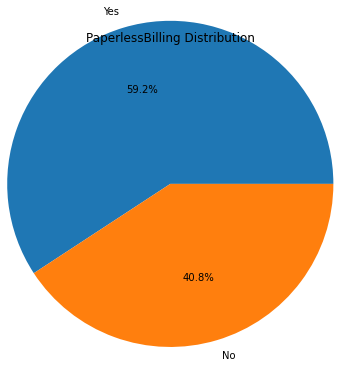

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [39]:
lb = df['PaperlessBilling'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("PaperlessBilling Distribution")
plt.show()
print(df['PaperlessBilling'].value_counts())

We can see that 59.2 % of the customers do Paperless Billing while 40.8 % of customers do not have Paperless Billing.

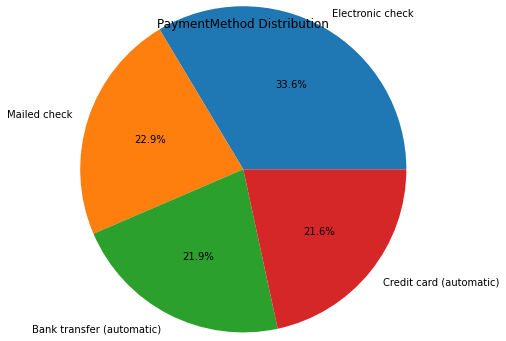

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [40]:
lb = df['PaymentMethod'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, autopct='%1.1f%%')
plt.title("PaymentMethod Distribution")
plt.show()
print(df['PaymentMethod'].value_counts())

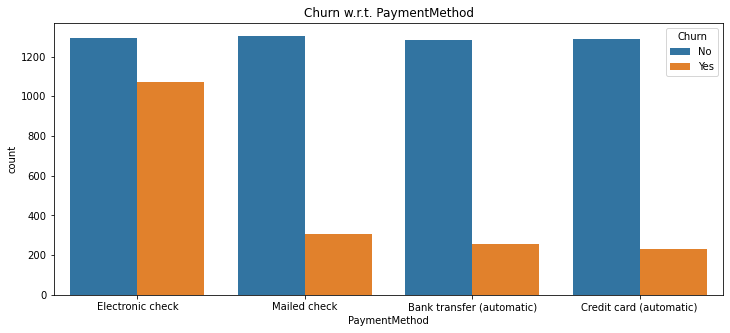

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=df)
plt.title("Churn w.r.t. PaymentMethod")
plt.show()

OBSERVATIONS:-
   1. From above we can that most of the customers i.e. 33.6 % do Electronic Check as the Payment method. While 22.9% customers use Mailed Check, 21.9% of customers use Bank Transfers & 21.6% of customers use Credit Card for the Payment.
   2. Customers using Electronic Check as Payment Method are Most likely to churn.

# Distribution Plots

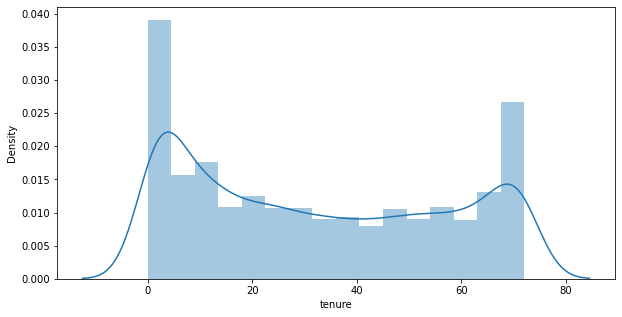

In [42]:
plt.figure(figsize=(10,5))
sns.distplot(df['tenure'])
plt.show()

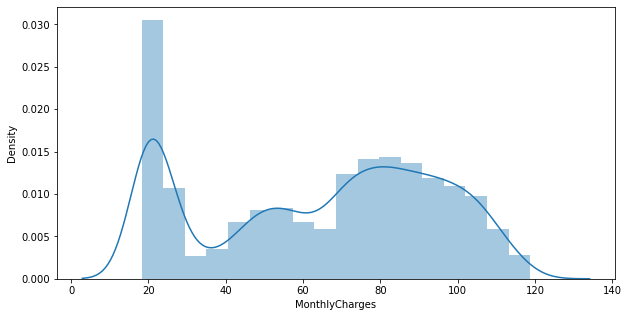

In [43]:
plt.figure(figsize=(10,5))
sns.distplot(df['MonthlyCharges'])
plt.show()

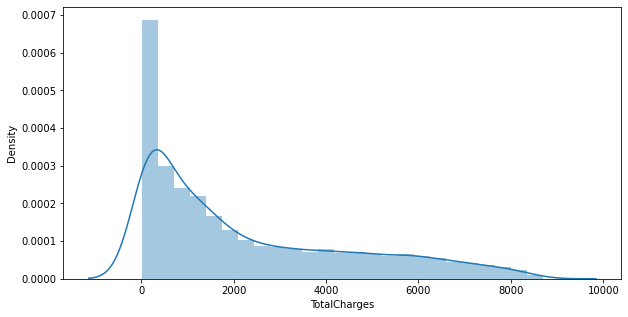

In [44]:
plt.figure(figsize=(10,5))
sns.distplot(df['TotalCharges'])
plt.show()

From above we can see that all the continuous data column tenure, MonthlyCharges & TotalCharges are skewed or Bi-nodal. That means transformation techniques will be required to standardise the Data.

# Bivariate Analysis

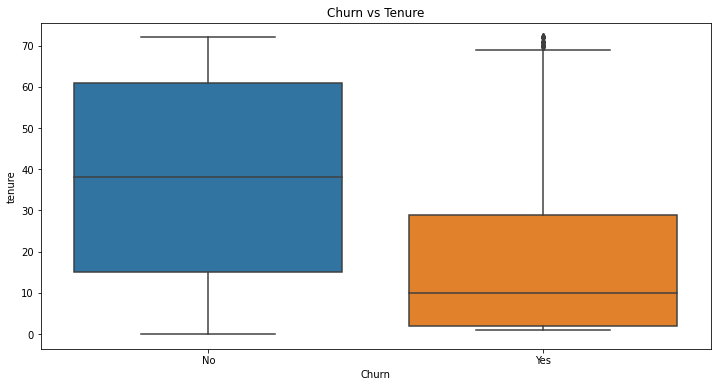

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn',y='tenure',data=df)
plt.title("Churn vs Tenure")
plt.show()

From above we can see that the Customers who do not Churn are having higher tenure than the people who stop the services.

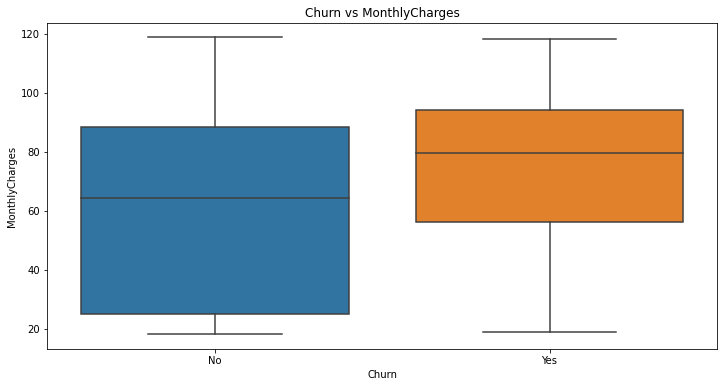

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.title("Churn vs MonthlyCharges")
plt.show()

From above we can see that the Customers that Churn & stop the services are paying higher Monthly Charges.

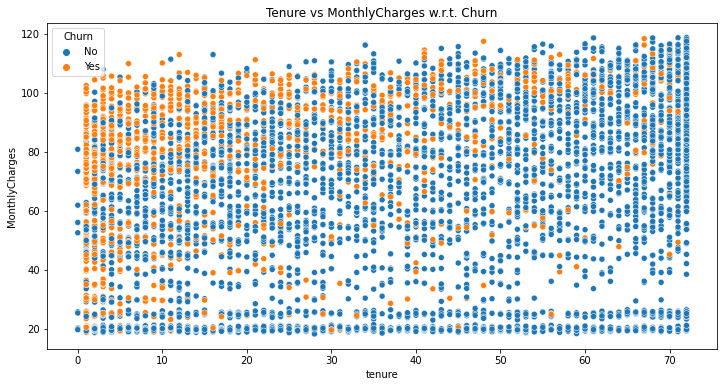

In [47]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='tenure',y='MonthlyCharges',hue='Churn',data=df)
plt.title("Tenure vs MonthlyCharges w.r.t. Churn")
plt.show()

From above we can see that the Customers with high Monthly Charges & Less Tenure are more likely to Churn & Stop the services.

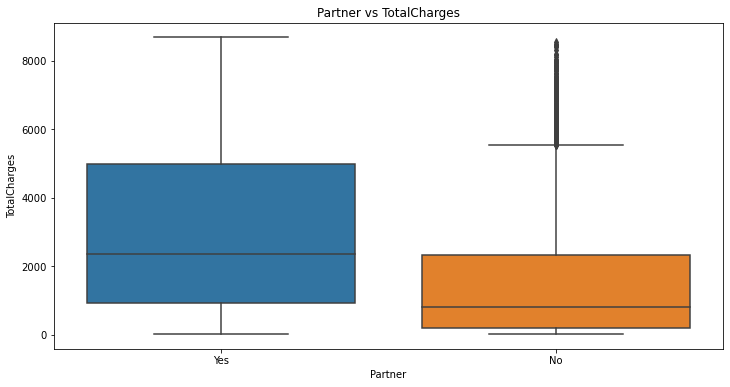

In [48]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Partner',y='TotalCharges',data=df)
plt.title("Partner vs TotalCharges")
plt.show()

We can see that the Customers Having partners are getting more Charges than the ones with No partner. 

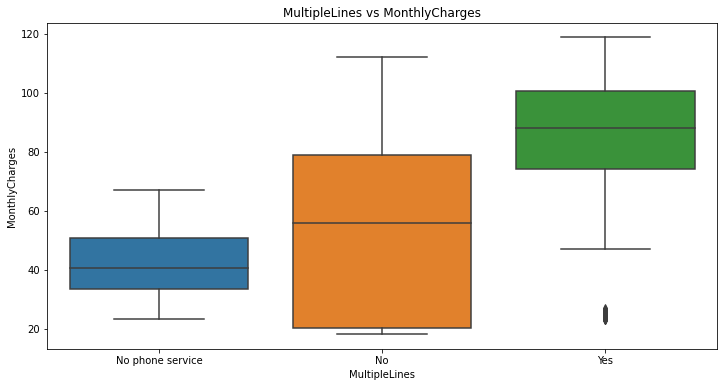

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MultipleLines',y='MonthlyCharges',data=df)
plt.title("MultipleLines vs MonthlyCharges")
plt.show()

From above we can see the Customer having Multiple lines do have to pay more Monthly Charge than the customers not having Multiple lines. And the people with No phone service get least Monthly Charge.

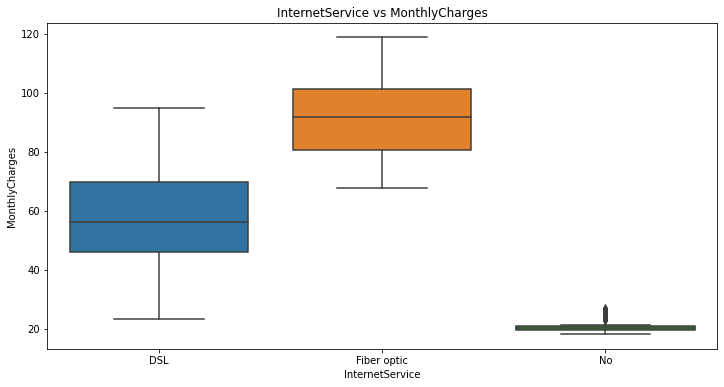

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)
plt.title("InternetService vs MonthlyCharges")
plt.show()

From above we can see that the Customers using Fiber Optice Internet Service pay higher Monthly Charges than the customers using DSL type internet sevice. While customers not using any Internet Service get the least Monthly Charge.

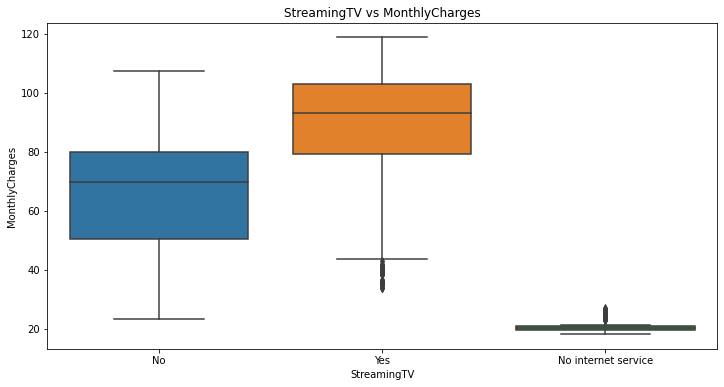

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x='StreamingTV',y='MonthlyCharges',data=df)
plt.title("StreamingTV vs MonthlyCharges")
plt.show()

From above we can see that the customers Streaming TV have higher Monthly Charge than the ones not Streaming TV.

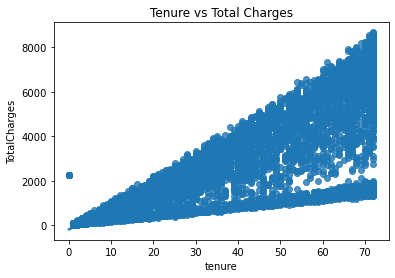

In [52]:
sns.regplot(x='tenure',y='TotalCharges',data=df)
plt.title("Tenure vs Total Charges")
plt.show()

We can see that with increase in Tenure of the Services the Total Charge also increases.

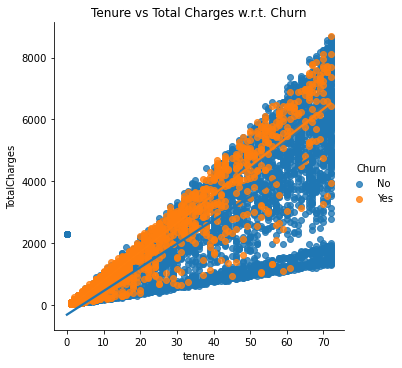

In [53]:
sns.lmplot(x='tenure',y='TotalCharges',data=df,hue='Churn')
plt.title("Tenure vs Total Charges w.r.t. Churn")
plt.show()

We can see that the Customers that churn & stop the services are getting more Total Charges than the one Not Churning away.

# Multi-Variate Analysis

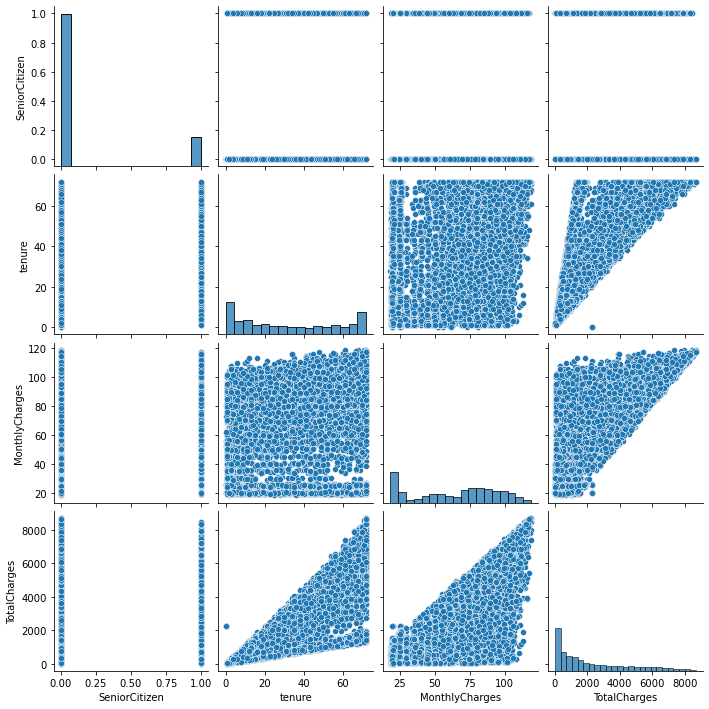

In [54]:
sns.pairplot(df)

# Data Preparation

We can drop customerID column as it does not have any relation with the Churn of the customer.

In [55]:
df.drop({'customerID'},axis=1,inplace=True)  # Removing Non-useful columns
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# CORRELATION

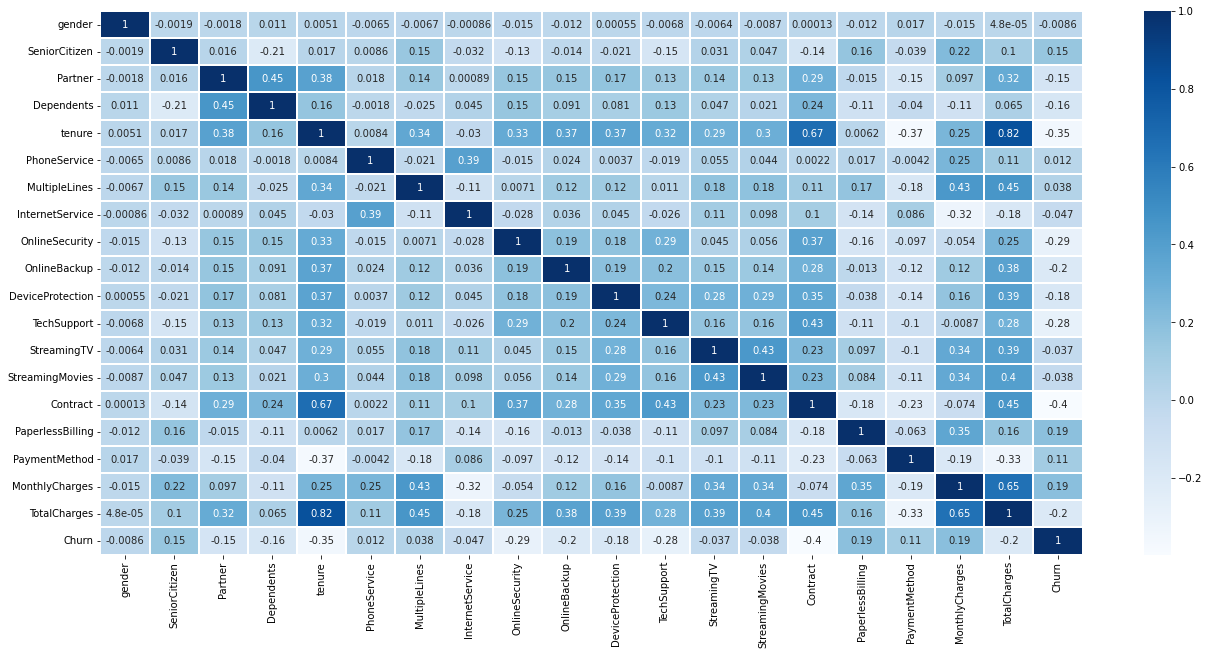

In [57]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above correlation chart we can see that the some columns are having high correlation(>=0.7) b/w them :-

   1. tenure & TotalCharges
   2. tenure & Contract
   3. MonthlyCharges & TotalCharges

CORRELATION with the Churn Column

In [58]:
df.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

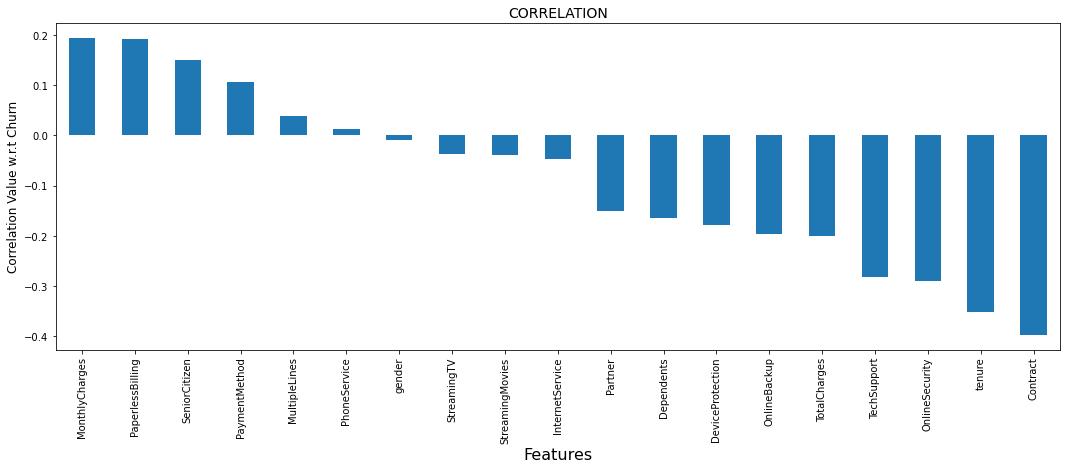

In [59]:
plt.figure(figsize=(18,6))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Churn",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

OBSERVATIONS:-
   1. MonthlyCharges, PaperlessBilling, SeniorCitizen, PaymentMethod, MultipleLines & PhoneService show -ve correlation with the target i.e. Churn. rest all columns have +ve correlation with the Churn.
   2. Contract Column is most correlated with the target(Churn).

# Data Balancing

In [60]:
x=df.drop({'Churn'},axis=1)         # Independent Columns

y=df.iloc[:,-1]          # Target Column

In [61]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

We can see that the no. of entries for each Churn Type data has big difference b/w each other.Therefore, Using SMOTE to Balance the data.

In [62]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
dx,dy=sm.fit_resample(x,y)
dy

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int32

In [63]:
dy.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

Now we can see that the Data is Balanced.

In [64]:
dy = pd.DataFrame(dy)
dy

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
10343,1
10344,1
10345,1
10346,1


In [65]:
dx.shape

(10348, 19)

# Treating Outliers

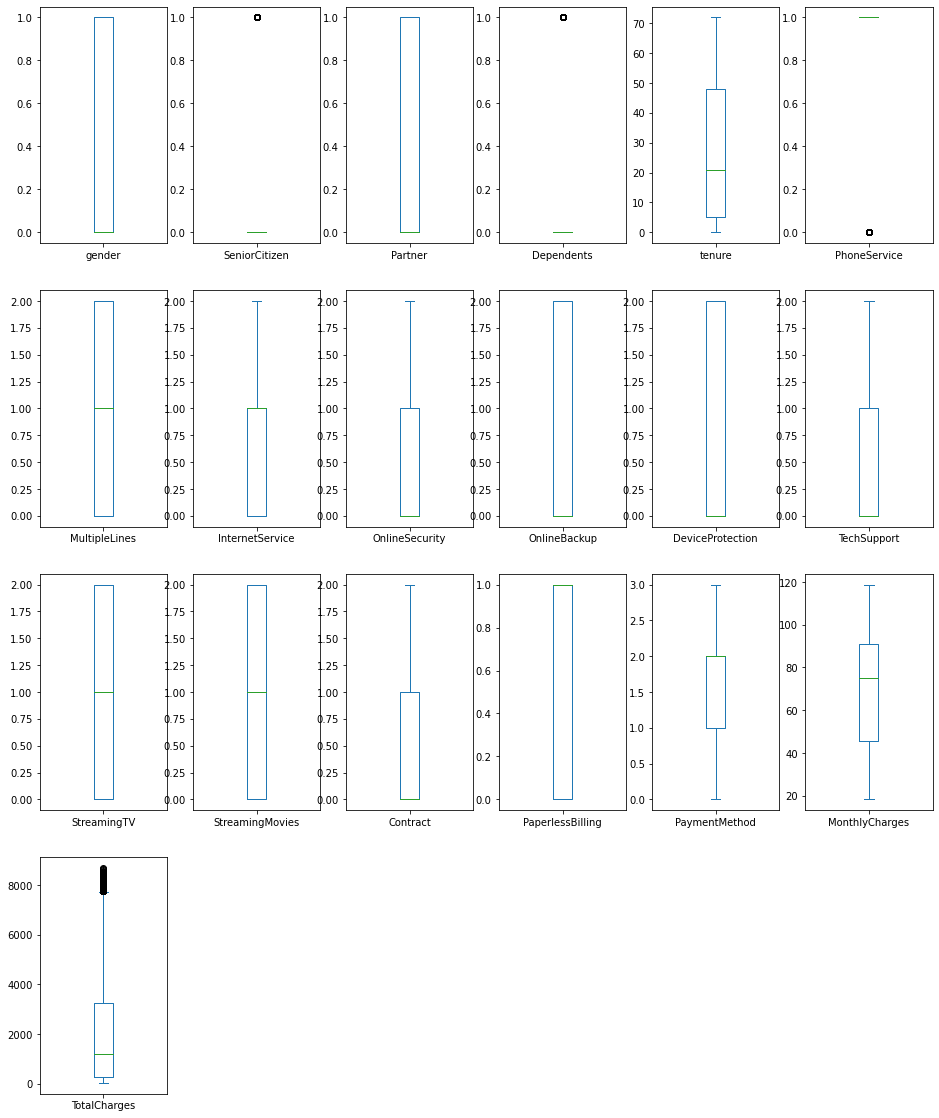

In [66]:
dx.plot(kind='box',subplots=True,layout=(4,6),figsize=(16,20)) 
plt.show()

We can see that only some ouliers are present in Total Charges column. But we will not remove the ouliers as most of the columns are cotegorical in nature which remove valid entries & the data will become biased. If outliers are considered for Categorical Columns. 

# Treating Skewness

In [67]:
dx.skew().sort_values(ascending=False)

SeniorCitizen       2.145019
Dependents          1.374357
Contract            1.155511
TotalCharges        1.114477
OnlineSecurity      0.808604
TechSupport         0.793723
tenure              0.512849
Partner             0.497161
DeviceProtection    0.485315
OnlineBackup        0.467252
gender              0.275520
InternetService     0.209210
MultipleLines       0.166564
StreamingTV         0.159606
StreamingMovies     0.134425
PaymentMethod      -0.221021
PaperlessBilling   -0.376476
MonthlyCharges     -0.415300
PhoneService       -2.564955
dtype: float64

Taking skewness threshold as +/-0.5. We can see that Skeness is only present in TotalCharges column. Rest all the columns are categorical in nature.

Removing Skewness from TotalCharges columns

In [68]:
from scipy.stats import boxcox
dx['TotalCharges']=boxcox(dx['TotalCharges'],0.5)
dx.skew().sort_values(ascending=False)

SeniorCitizen       2.145019
Dependents          1.374357
Contract            1.155511
OnlineSecurity      0.808604
TechSupport         0.793723
tenure              0.512849
Partner             0.497161
DeviceProtection    0.485315
OnlineBackup        0.467252
TotalCharges        0.424917
gender              0.275520
InternetService     0.209210
MultipleLines       0.166564
StreamingTV         0.159606
StreamingMovies     0.134425
PaymentMethod      -0.221021
PaperlessBilling   -0.376476
MonthlyCharges     -0.415300
PhoneService       -2.564955
dtype: float64

We can see that now the Skewnees has been removed & all the values are in acceptable range.

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [72]:
calc_vif(dx)

,Variables,VIF FACTOR
0,gender,1.749457
1,SeniorCitizen,1.258887
2,Partner,2.452659
3,Dependents,1.810977
4,tenure,33.507657
5,PhoneService,14.758466
6,MultipleLines,2.771990
7,InternetService,4.296575
8,OnlineSecurity,2.099402
9,OnlineBackup,2.269383


We can see that TotalCharges column has the highest V.I.F. Factor. So removing it.

In [73]:
dx.drop({'TotalCharges'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,gender,1.746625
1,SeniorCitizen,1.258887
2,Partner,2.451875
3,Dependents,1.810791
4,tenure,6.596175
5,PhoneService,14.581673
6,MultipleLines,2.751702
7,InternetService,4.161628
8,OnlineSecurity,2.089885
9,OnlineBackup,2.249876


Now, We can see that PhoneService & MonthlyCharges columns are having the highest V.I.F. close to each other.

So, removing the column which shows less correlation with the target i.e.PhoneService column.

In [74]:
dx.drop({'PhoneService'},axis=1,inplace=True)          
calc_vif(dx)

,Variables,VIF FACTOR
0,gender,1.735336
1,SeniorCitizen,1.257500
2,Partner,2.451873
3,Dependents,1.798435
4,tenure,6.593566
5,MultipleLines,2.678363
6,InternetService,2.453228
7,OnlineSecurity,2.068916
8,OnlineBackup,2.249507
9,DeviceProtection,2.376228


We can see that now the V.I.F. values have been reduced & all the values are below 10 which is acceptable.

# Data Scaling

In [75]:
dx.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
count,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000,10348.000000
mean,0.431774,0.134325,0.379397,0.216853,27.626305,0.916312,0.838230,0.614515,0.765752,0.757634,0.620796,0.918535,0.931291,0.489950,0.592482,1.555276,68.067709
std,0.495347,0.341018,0.485260,0.412122,23.903364,0.927628,0.677062,0.806930,0.853205,0.854448,0.810199,0.887198,0.887188,0.762256,0.491396,0.997987,28.673368
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.649983
50%,0.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.900000
75%,1.000000,0.000000,1.000000,0.000000,48.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.850000
max,1.000000,1.000000,1.000000,1.000000,72.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000


We can see that some columns like tenure & MonthlyCharges are in different scale from the rest of the columns. So we will scale the data.

In [76]:
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()

In [77]:
scale=mns.fit_transform(dx)
dx=pd.DataFrame(scale,columns=dx.columns)
dx

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.0,1.0,0.0,0.013889,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423
1,1.0,0.0,0.0,0.0,0.472222,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075
2,1.0,0.0,0.0,0.0,0.027778,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229
3,1.0,0.0,0.0,0.0,0.625000,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303
4,0.0,0.0,0.0,0.0,0.027778,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,1.0,0.0,0.0,0.0,0.013889,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.519936
10344,0.0,0.0,0.0,0.0,0.055556,1.0,0.5,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,0.725561
10345,0.0,0.0,0.0,0.0,0.013889,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,1.0,1.000000,0.012070
10346,0.0,0.0,0.0,0.0,0.055556,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.603862


Now we can see all the Columns are in same scale.

# Splitting the Data

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

Finding out the best Random State Value

In [82]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=i,test_size=0.22)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_test,pred_test)*100,1) > 81.0:
        print("At random state",i,"The model preforms very well")
        print("Model Accuracy score is :-",accuracy_score(y_test,pred_test)*100,'\n')

At random state 276 The model preforms very well
Model Accuracy score is :- 81.11550285463329 

At random state 342 The model preforms very well
Model Accuracy score is :- 81.99385155906896 

At random state 406 The model preforms very well
Model Accuracy score is :- 81.15942028985508 

At random state 409 The model preforms very well
Model Accuracy score is :- 81.379007465964 

At random state 462 The model preforms very well
Model Accuracy score is :- 81.0715854194115 

At random state 495 The model preforms very well
Model Accuracy score is :- 81.24725516029864 

At random state 702 The model preforms very well
Model Accuracy score is :- 81.20333772507685 

At random state 773 The model preforms very well
Model Accuracy score is :- 81.379007465964 

At random state 777 The model preforms very well
Model Accuracy score is :- 81.24725516029864 

At random state 818 The model preforms very well
Model Accuracy score is :- 81.33509003074221 

At random state 890 The model preforms very w

From above we can see that Model is performing best at Random State = 342. Beacuse for random state=342 Model's accuracy score is highest

Therefore, using Random State = 342 for further working & Splitting the DataFrame.

In [83]:
x_train,x_test,y_train,y_test= train_test_split(dx,dy,random_state=342,test_size=0.22)

In [84]:
x_train.shape

(8071, 17)

In [85]:
y_train.shape

(8071, 1)

In [86]:
x_test.shape

(2277, 17)

In [87]:
y_test.shape

(2277, 1)

# Testing with Different Models

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [89]:
lg = LogisticRegression()
gn = GaussianNB()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()

model = [lg,gn,knn,svc,dtc]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of LogisticRegression() is: 0.8199385155906895
[[ 866  255]
 [ 155 1001]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1121
           1       0.80      0.87      0.83      1156

    accuracy                           0.82      2277
   macro avg       0.82      0.82      0.82      2277
weighted avg       0.82      0.82      0.82      2277



Accuracy Score of GaussianNB() is: 0.8076416337285902
[[853 268]
 [170 986]]
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      1121
           1       0.79      0.85      0.82      1156

    accuracy                           0.81      2277
   macro avg       0.81      0.81      0.81      2277
weighted avg       0.81      0.81      0.81      2277



Accuracy Score of KNeighborsClassifier() is: 0.795344751866491
[[821 300]
 [166 990]]
              precision    recall  f1-score   support

           0       0.83      0.73  

From above algorithms we can see that SVC() & LogisticRegression() are permoving well with the data as compared to other algoritms. While SVC() is getting most accuracy.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble methods to train the data to increase the model performance.

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [91]:
rf = RandomForestClassifier()
bg = BaggingClassifier()
ad = AdaBoostClassifier()
gb = GradientBoostingClassifier()
et = ExtraTreesClassifier()

model = [rf,bg,ad,gb,et]

for m in model:
    m.fit(x_train,y_train)
    pred_test=m.predict(x_test)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test))
    print(confusion_matrix(y_test,pred_test))
    print(classification_report(y_test,pred_test))
    print('\n')

Accuracy Score of RandomForestClassifier() is: 0.8410188844971453
[[933 188]
 [174 982]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1121
           1       0.84      0.85      0.84      1156

    accuracy                           0.84      2277
   macro avg       0.84      0.84      0.84      2277
weighted avg       0.84      0.84      0.84      2277



Accuracy Score of BaggingClassifier() is: 0.8181818181818182
[[936 185]
 [229 927]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1121
           1       0.83      0.80      0.82      1156

    accuracy                           0.82      2277
   macro avg       0.82      0.82      0.82      2277
weighted avg       0.82      0.82      0.82      2277



Accuracy Score of AdaBoostClassifier() is: 0.8278436539306104
[[ 878  243]
 [ 149 1007]]
              precision    recall  f1-score   support

           0       0.85  

From above ensemble methods we can see that RandomForestClassifier(), GradientBoostingClassifier() & ExtraTreesClassifier() is performing well with the data aas compared to other ensemble methods.

While out of these GradientBoostingClassifier() is getting the highest accuracy.

# Gradient Descent Algorithm

In [92]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [93]:
sgd.fit(x_train,y_train)
pred_test=sgd.predict(x_test)
print('Accuracy Score of',sgd,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of SGDClassifier() is: 0.8076416337285902
[[ 784  337]
 [ 101 1055]]
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1121
           1       0.76      0.91      0.83      1156

    accuracy                           0.81      2277
   macro avg       0.82      0.81      0.80      2277
weighted avg       0.82      0.81      0.81      2277



We can see that SGDClassifier() is not performing that well as compared with other algorithms.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [98]:
from sklearn.model_selection import cross_val_score
model = [lg,svc,rf,gb,et]

for m in model:
    pred_test=m.predict(x_test)
    score = cross_val_score(m,dx,dy,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,pred_test)*100)
    print("\n")

For LogisticRegression() Cross Validation score is:- 78.7598340349722
Accuracy Score of LogisticRegression() is: 81.99385155906896


For SVC() Cross Validation score is:- 80.57705302335138
Accuracy Score of SVC() is: 83.22353974527887


For RandomForestClassifier() Cross Validation score is:- 83.03180373724851
Accuracy Score of RandomForestClassifier() is: 84.10188844971454


For GradientBoostingClassifier() Cross Validation score is:- 81.9589290259011
Accuracy Score of GradientBoostingClassifier() is: 84.36539306104524


For ExtraTreesClassifier() Cross Validation score is:- 82.08485043767787
Accuracy Score of ExtraTreesClassifier() is: 83.22353974527887




Now from above we can confirm that RandomForestClassifier() is working Best for the data as:-

   1. Cross Val-Score is highest is case of RandomForestClassifier().
   3. Also, Cross Val-Score & Accuracy score are very closest to each other for RandomForestClassifier()
   
Therefore, Using RandomForestClassifier() as the Final Algorithm & Optimization.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [99]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()

In [100]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 100}


In [101]:
best_result = gd_sr.best_score_
print(best_result)

0.8277780719018188


In [102]:
gd_sr.best_estimator_

RandomForestClassifier(max_depth=9, max_features='log2')

Using these above parameters for Final training of the Model.

In [103]:
rf = RandomForestClassifier(max_depth=9, max_features='log2')

In [105]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test))
print(confusion_matrix(y_test,pred_test))
print(classification_report(y_test,pred_test))

Accuracy Score of RandomForestClassifier(max_depth=9, max_features='log2') is: 0.8511198945981555
[[ 911  210]
 [ 129 1027]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1121
           1       0.83      0.89      0.86      1156

    accuracy                           0.85      2277
   macro avg       0.85      0.85      0.85      2277
weighted avg       0.85      0.85      0.85      2277



We can see that the Model performance has increased after Hyperparameter Tuning. As the Model accuracy score has increased. 

# Cross-Validation of Best Model

In [106]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,dx,dy,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",accuracy_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 80.12176265945111
Accuracy Score of model is :- 85.11198945981555


At cv:- 3
Cross Validation score is:- 81.20500095946035
Accuracy Score of model is :- 85.11198945981555


At cv:- 4
Cross Validation score is:- 82.42172400463859
Accuracy Score of model is :- 85.11198945981555


At cv:- 5
Cross Validation score is:- 82.36473079715981
Accuracy Score of model is :- 85.11198945981555


At cv:- 6
Cross Validation score is:- 82.63534416086621
Accuracy Score of model is :- 85.11198945981555


At cv:- 7
Cross Validation score is:- 82.86782399955456
Accuracy Score of model is :- 85.11198945981555


At cv:- 8
Cross Validation score is:- 82.75195709628949
Accuracy Score of model is :- 85.11198945981555


At cv:- 9
Cross Validation score is:- 83.25371778862525
Accuracy Score of model is :- 85.11198945981555




We Accuracy score is closest to Cross Val Score at cv = 9. Using cv=9 for final Model validation.

In [112]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
score = cross_val_score(rf,dx,dy,cv=9)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",c_score*100)
print('Accuracy Score of',rf,'is:',accuracy_score(y_test,pred_test)*100)

For RandomForestClassifier(max_depth=9, max_features='log2') Cross Validation score is:- 83.070201771757
Accuracy Score of RandomForestClassifier(max_depth=9, max_features='log2') is: 84.93631971892842


We can see that the Cross Validation Score is almost equal to Accuracy Score. Hence we are heading towards a good approach and there is no overfitting/underfitting.

# AUC ROC Curve

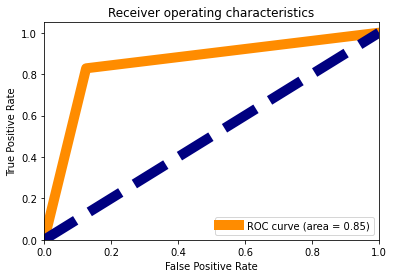

In [113]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.legend(loc="lower right")
plt.show()

From above we can confirm that are Model is performing Well as the Area Under the Curve is Almost 85%

# Saving the best Model

In [114]:
import pickle

filename = 'Customer_Churn.pkl'

pickle.dump(rf, open(filename,'wb'))  

# Conclusion

In [115]:
loaded_model = pickle.load(open('Customer_Churn.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8493631971892841


In [116]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
2272,0,0
2273,1,1
2274,0,0
2275,0,1


From above we can see that almost all the predicted & original values are matching. Hence our model is performing good.